In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)
#그래프의 폰트사이즈 고정

import missingno as msno
'''
파이썬 missingno 패키지는 pandas 데이터프레임 데이터에서 
누락된 데이터를 찾고 시각화하는 기능을 제공하는 패키지입니다.
'''

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
'''
이 명령을 사용하면 그래프가 
Jupyter Notebook의 셀 내부에 표시되며 
별도의 창으로 열리지 않습니다.
'''     


'\n이 명령을 사용하면 그래프가 \nJupyter Notebook의 셀 내부에 표시되며 \n별도의 창으로 열리지 않습니다.\n'

In [7]:
'''
기본 프로세스 목록
1. 데이터셋 확인
2. eda
3. feature engineering
4. model building
5. learning & prediction
6. evaluation
'''

'\n기본 프로세스 목록\n1. 데이터셋 확인\n2. eda\n3. feature engineering\n4. model building\n5. learning & prediction\n6. evaluation\n'

In [8]:
# 1. 데이터 셋 확인

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')   

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_train.describe()

#age에 null값이 많음이 보인다.
#그래프로 시각화 해보자.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#1.1 null data check

for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of Nan value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

#단순 문자열 포매팅

column : PassengerId	 Percent of Nan value : 0.00%
column :   Survived	 Percent of Nan value : 0.00%
column :     Pclass	 Percent of Nan value : 0.00%
column :       Name	 Percent of Nan value : 0.00%
column :        Sex	 Percent of Nan value : 0.00%
column :        Age	 Percent of Nan value : 19.87%
column :      SibSp	 Percent of Nan value : 0.00%
column :      Parch	 Percent of Nan value : 0.00%
column :     Ticket	 Percent of Nan value : 0.00%
column :       Fare	 Percent of Nan value : 0.00%
column :      Cabin	 Percent of Nan value : 77.10%
column :   Embarked	 Percent of Nan value : 0.22%


In [12]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of Nan value : {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

#단순 문자열 포매팅

column : PassengerId	 Percent of Nan value : 0.00%
column :     Pclass	 Percent of Nan value : 0.00%
column :       Name	 Percent of Nan value : 0.00%
column :        Sex	 Percent of Nan value : 0.00%
column :        Age	 Percent of Nan value : 20.57%
column :      SibSp	 Percent of Nan value : 0.00%
column :      Parch	 Percent of Nan value : 0.00%
column :     Ticket	 Percent of Nan value : 0.00%
column :       Fare	 Percent of Nan value : 0.24%
column :      Cabin	 Percent of Nan value : 78.23%
column :   Embarked	 Percent of Nan value : 0.00%


In [13]:
'''
분석결과:
train, test set에서 age의 20%, cabin의 77%, embarked(train) 0.22퍼가 손실됨
'''

'\n분석결과:\ntrain, test set에서 age의 20%, cabin의 77%, embarked(train) 0.22퍼가 손실됨\n'

<Axes: >

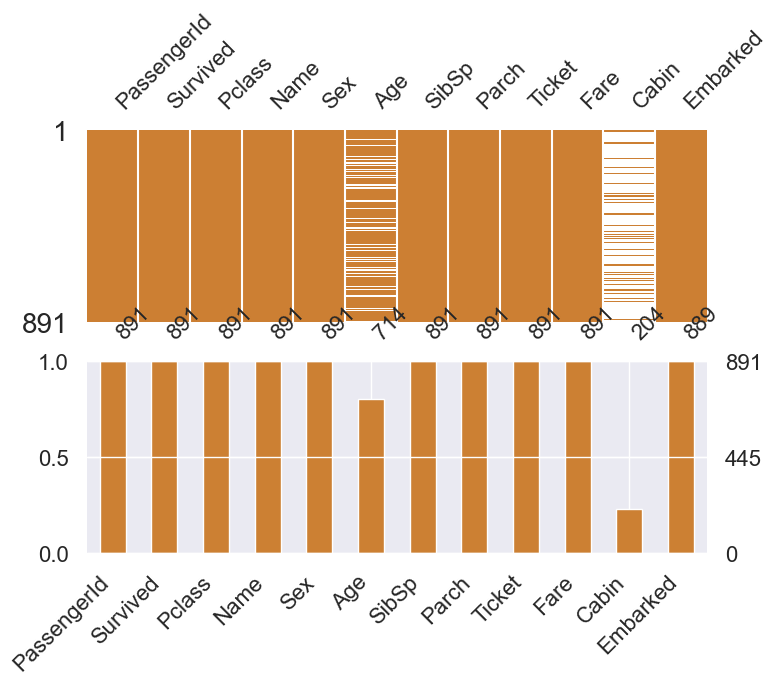

In [14]:
#missingno pkg 사용하여 시각화
fig, axes = plt.subplots(2,1)
msno.matrix(df = df_train.iloc[:,:], figsize= (6,6), color = (0.8, 0.5, 0.2), ax = axes[0])
msno.bar(df = df_train.iloc[:,:], figsize= (6,6), color = (0.8, 0.5, 0.2), ax = axes[1])


<Axes: >

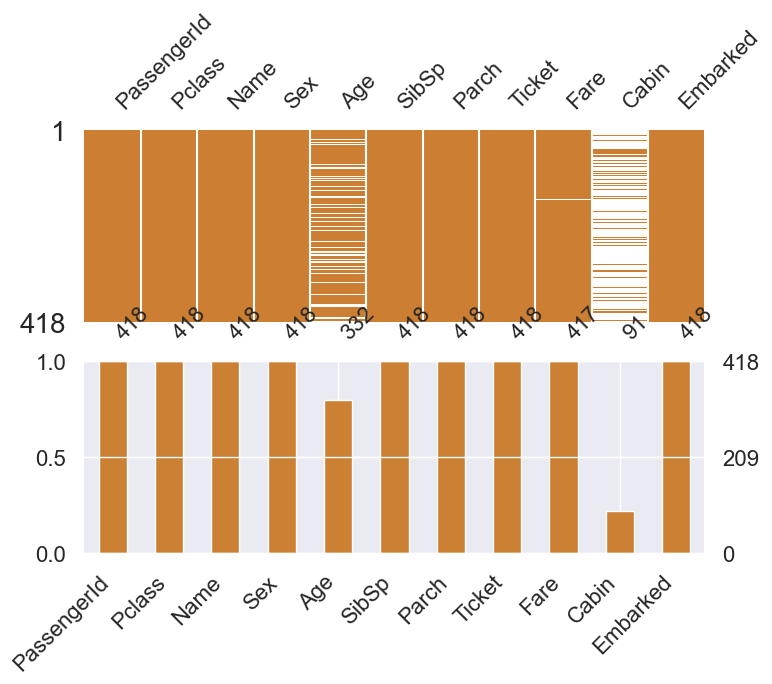

In [15]:
#missingno pkg 사용하여 시각화
fig, axes = plt.subplots(2,1)
msno.matrix(df = df_test.iloc[:,:], figsize= (6,6), color = (0.8, 0.5, 0.2), ax = axes[0])
msno.bar(df = df_test.iloc[:,:], figsize= (6,6), color = (0.8, 0.5, 0.2), ax = axes[1])


Text(0.5, 1.0, 'Count plot - Survived')

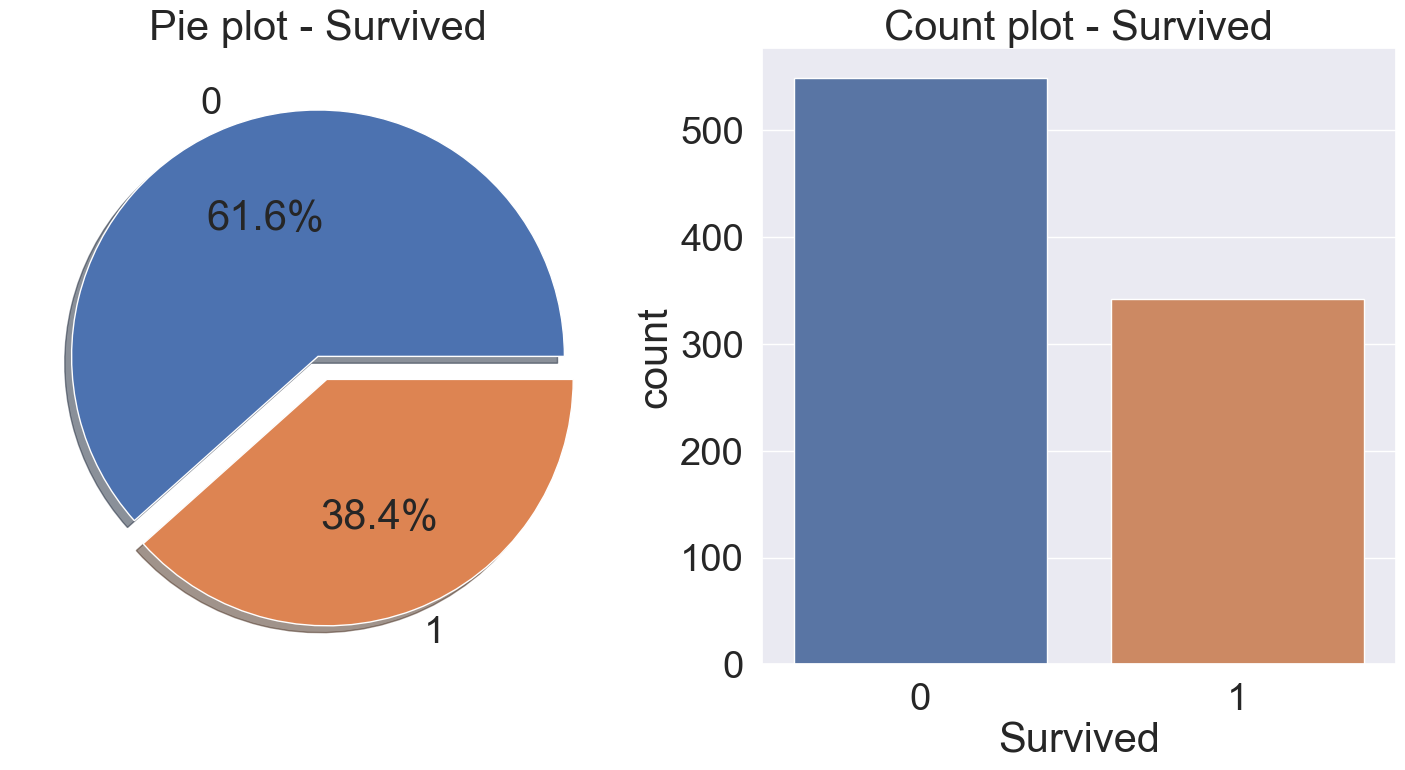

In [16]:
#1.2 target label 확인
## target label의 dist가 어떠한가?
## binary classification에서는 1,0 분포에 따라 방법이 달라질 수 있음

f, ax = plt.subplots(1,2, figsize = (18,8))
df_train.Survived.value_counts().plot.pie(explode = [0, 0.1 ], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x= 'Survived', data=df_train , ax=ax[1]) #왜 원하는대로 안나오지?
ax[1].set_title('Count plot - Survived')

In [17]:
'''
생사비율 4:6
나름 균일한 데이터이다. - balanced                      
'''

'\n생사비율 4:6\n나름 균일한 데이터이다. - balanced                      \n'

        Survived
Pclass          
1            216
2            184
3            491
Axes(0.125,0.11;0.775x0.77)


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


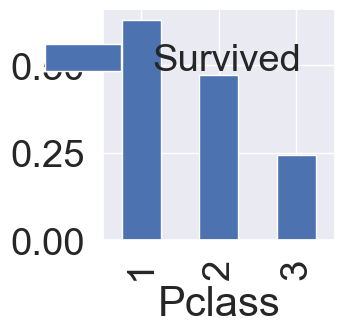

In [18]:
#2. EDA
##2.1 pclass

print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count())
print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().plot.bar(figsize = (3,3)))


#pd.crosstab을 사용해도됨
pd.crosstab(df_train.Pclass, df_train.Survived, margins = True).style.background_gradient(cmap = 'summer_r')



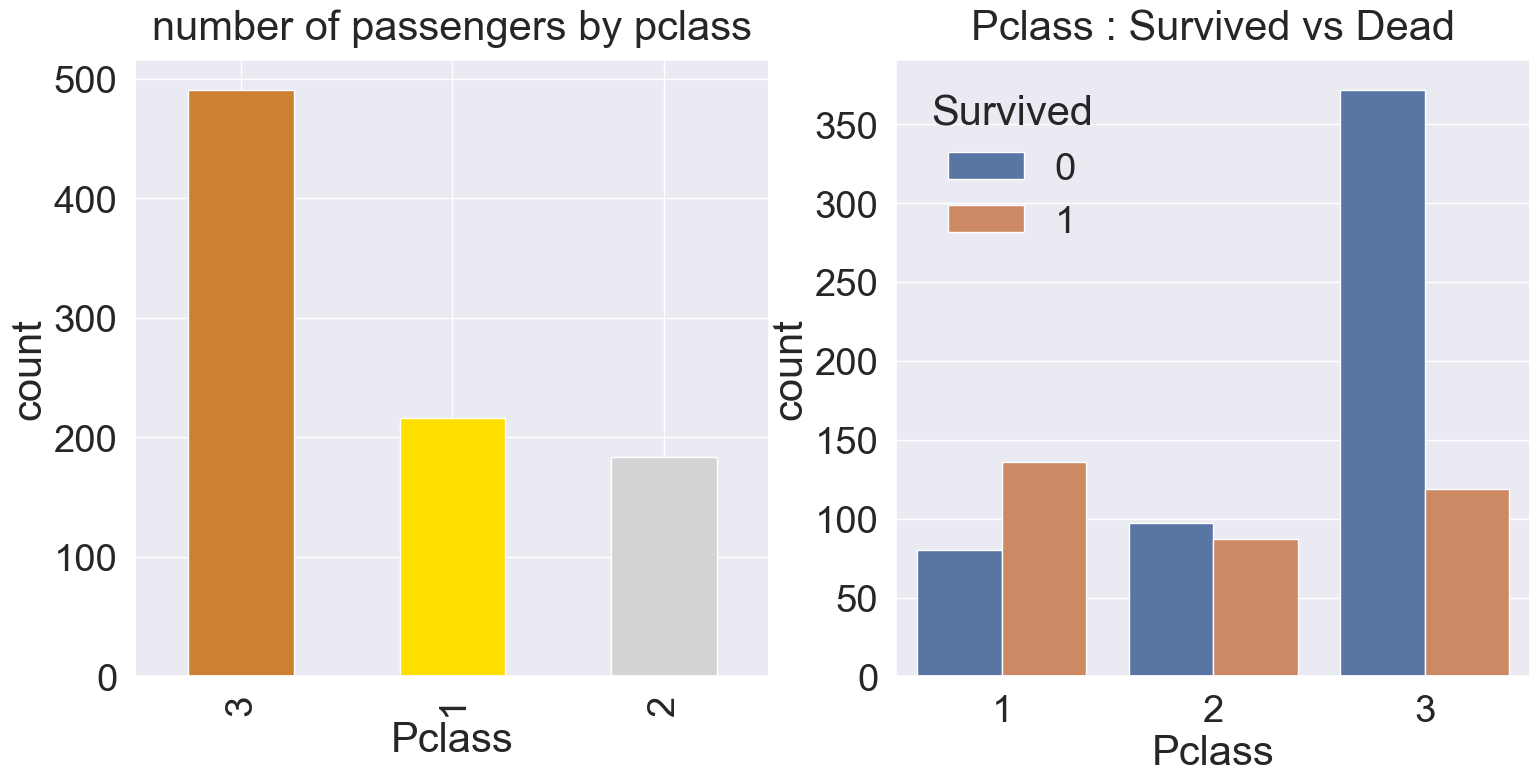

In [19]:
# sns.countplot을 이용한 시각화
y_position = 1.02
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train.Pclass.value_counts().plot.bar(color = ['#CD7F32', '#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('number of passengers by pclass', y = y_position)
ax[0].set_ylabel('count')

sns.countplot( x = 'Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

#as_index인자는 pclass의 index 사용 여부
# 숫자는 3등석 생존자가 많으나, 비율은 상위좌석일수록 생존확률이 높다


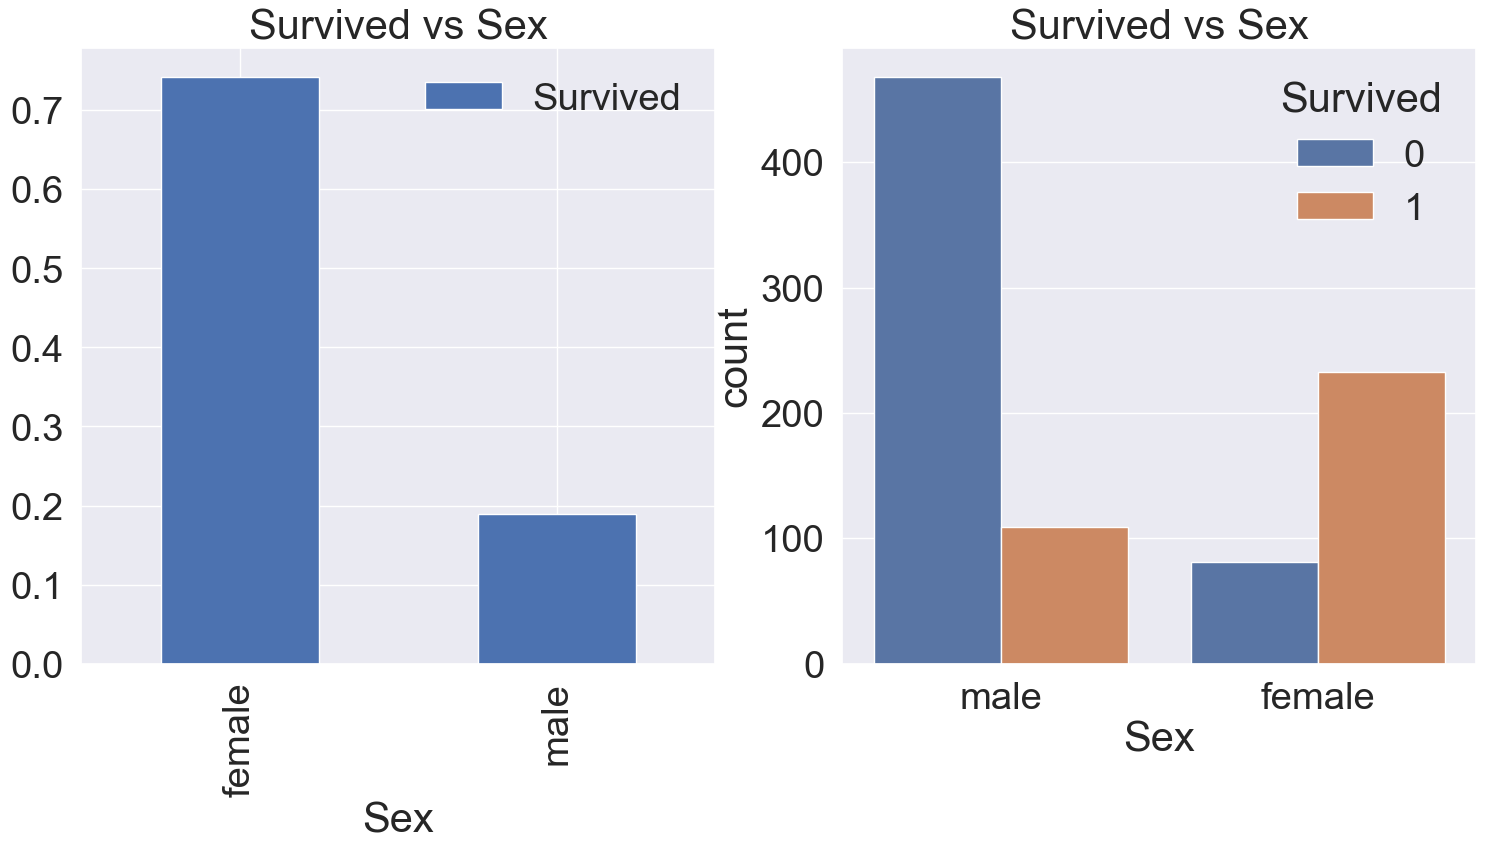

In [20]:
#2.2 sex

f, ax=  plt.subplots(1,2, figsize = (18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x = 'Sex', hue = 'Survived' , data = df_train, ax = ax[1])
ax[1].set_title('Survived vs Sex')

plt.show()

#여성의 생존률이 남성에 비해 훨씬 높다.

In [21]:
print(df_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by = 'Survived', ascending = False))
pd.crosstab(df_train['Sex'], df_train['Survived'])

#여성의 생존률이 훨씬 높다.

        Survived
Sex             
female  0.742038
male    0.188908


Survived,0,1
Sex,,
female,81,233
male,468,109


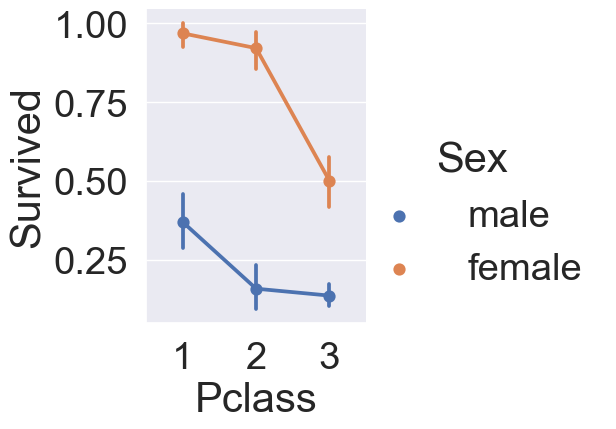

In [30]:
#2.3 both sex and pclass : 변수상호관계 분석
sns.catplot(x= 'Pclass', y = 'Survived', hue = 'Sex', data =df_train, kind = 'point')

# 모든 class에서 여성의 생존비율이 더 높다.

In [31]:
#2.4 age
print('max : {:.1f}'.format(df_train.Age.max()))
print('min : {:.1f}'.format(df_train.Age.min()))
print('mean : {:.1f}'.format(df_train.Age.mean()))

max : 80.0
min : 0.4
mean : 29.7


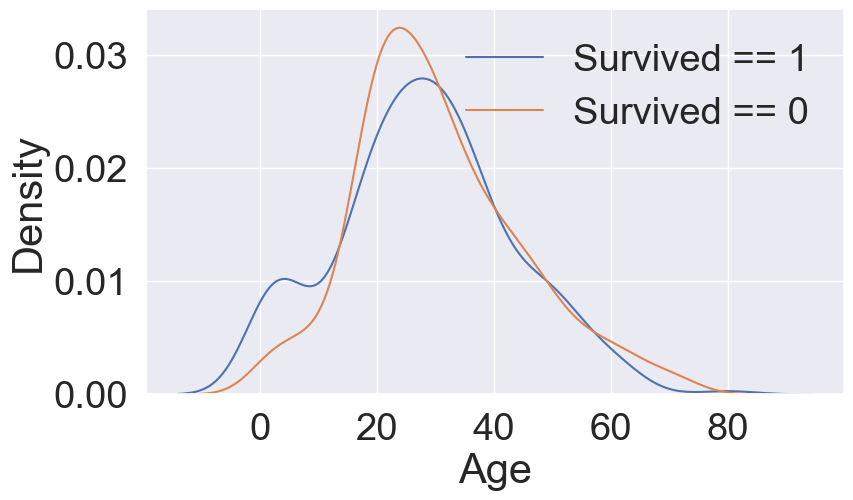

In [40]:
# 생존에 따른 age의 히스토그램 그려보기

fig, ax = plt.subplots(1,1, figsize = (9,5))
sns.kdeplot(df_train[df_train.Survived == 1].Age, ax = ax)
sns.kdeplot(df_train[df_train.Survived == 0].Age, ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])

#kdeplot은 kernel density estimation을 의미함.
#  생존자 중 어린이바율이 더 높다

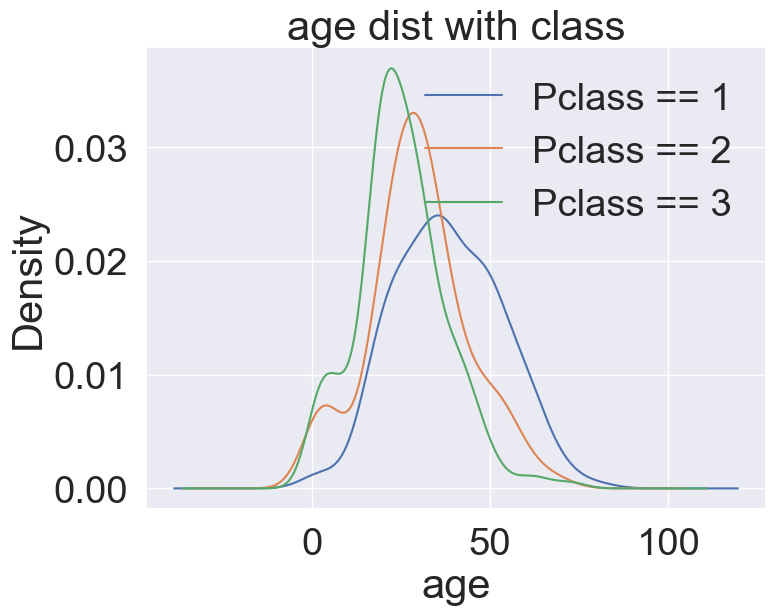

In [41]:
#클래스 별로 나이분포
plt.figure(figsize = (8,6))
df_train[df_train.Pclass == 1].Age.plot(kind = 'kde')
df_train[df_train.Pclass == 2].Age.plot(kind = 'kde')
df_train[df_train.Pclass == 3].Age.plot(kind = 'kde')

plt.xlabel('age')
plt.title('age dist with class')
plt.legend(['Pclass == 1', 'Pclass == 2','Pclass == 3'])


'''
등급수가 높은 좌석일수록 연령층이 높은 경향이 있음
그렇다면, 나이에 따른 생존률은?
'''

